In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/fifa_players.csv')

In [3]:
df.head(10)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87
5,V. van Dijk,Virgil van Dijk,7/8/1991,27,193.04,92.1,CB,Netherlands,88,90,...,64,82,88,41,60,62,87,90,89,84
6,K. Mbappé,Kylian Mbappé,12/20/1998,20,152.40,73.0,"RW,ST,RM",France,88,95,...,78,62,38,88,82,70,86,34,34,32
7,S. Agüero,Sergio Leonel Agüero del Castillo,6/2/1988,30,172.72,69.9,ST,Argentina,89,89,...,83,65,24,92,83,83,90,30,20,12
8,M. Neuer,Manuel Neuer,3/27/1986,32,193.04,92.1,GK,Germany,89,89,...,16,29,30,12,70,47,70,17,10,11
9,E. Cavani,Edinson Roberto Cavani Gómez,2/14/1987,32,185.42,77.1,ST,Uruguay,89,89,...,79,84,48,93,77,85,82,52,45,39


In [13]:
df.shape

(17954, 51)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [5]:
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


In [6]:
df.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

In [9]:
df.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [19]:
df1=df['release_clause_euro'].value_counts().sort_values(ascending=False).reset_index().head(10).rename(columns={'index':'release_clause_euro'})

,release_clause_euro,count
0,1100000.0,509
1,1200000.0,436
2,1300000.0,408
3,1400000.0,347
4,1500000.0,312
5,1600000.0,284
6,1000000.0,256
7,1700000.0,235
8,1800000.0,231
9,1900000.0,206


In [21]:
df1.columns

Index(['release_clause_euro', 'count'], dtype='object')

AttributeError: 'Axes' object has no attribute 'head'

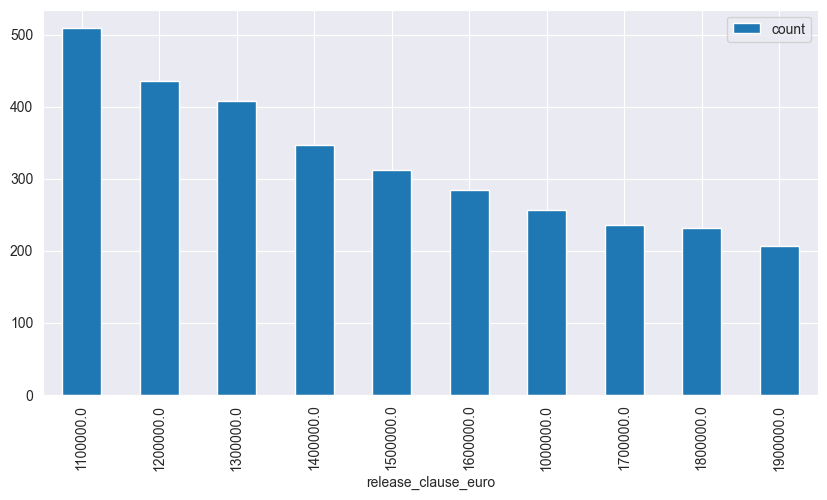

In [22]:
df1.plot(kind='bar',x='release_clause_euro',y='count',figsize=(10,5)).head(10)

**Distribution of Player Ages**

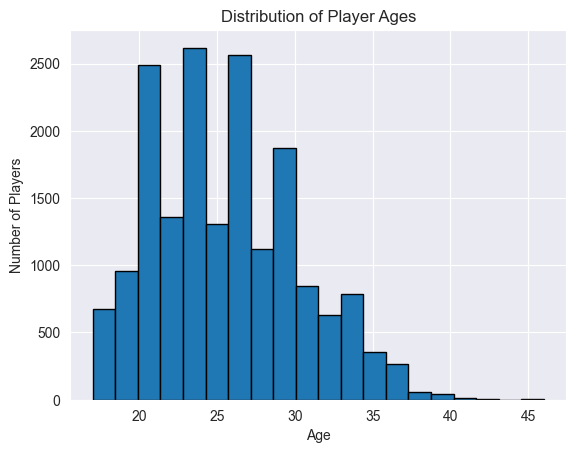

In [4]:
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()

**Nationality Count Plot**

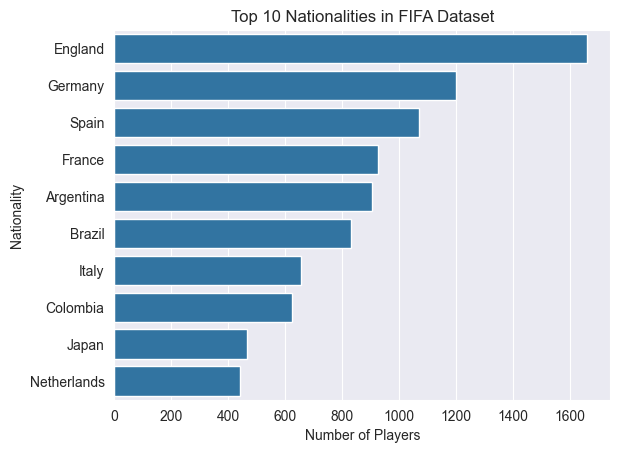

In [3]:
sns.countplot(y='nationality', data=df, order=df['nationality'].value_counts().index[:10], palette="Oranges", hue='nationality')
plt.title('Top 10 Nationalities in FIFA Dataset')
plt.xlabel('Number of Players')
plt.ylabel('Nationality')
plt.show()

**Overall Rating Distribution**

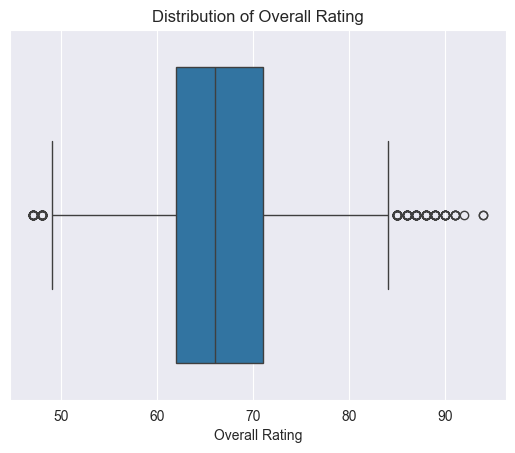

In [4]:
sns.boxplot(x=df['overall_rating'])
plt.title('Distribution of Overall Rating')
plt.xlabel('Overall Rating')
plt.show()

<Axes: xlabel='potential'>

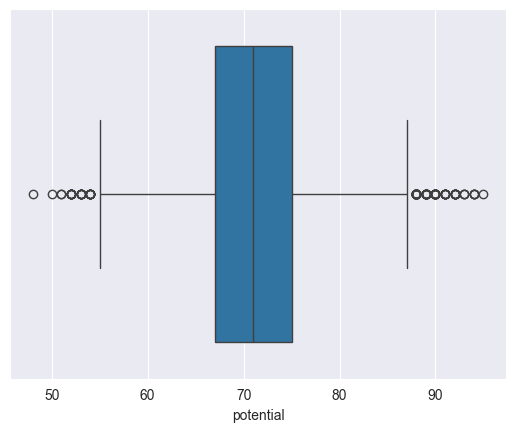

In [5]:
sns.boxplot(x=df['potential'])

<Axes: xlabel='value_euro'>

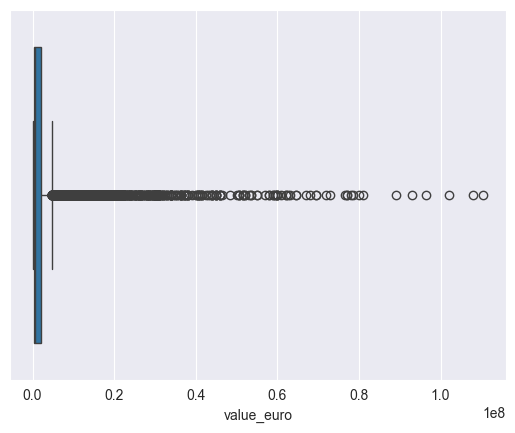

In [6]:
sns.boxplot(x=df['value_euro'])

<Axes: xlabel='wage_euro'>

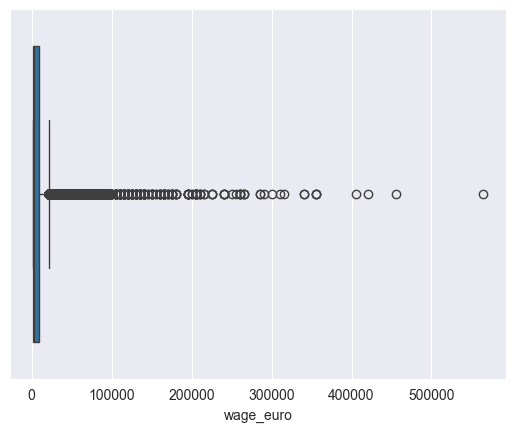

In [7]:
sns.boxplot(x=df['wage_euro'])

**Potential vs. Value Scatter Plot**

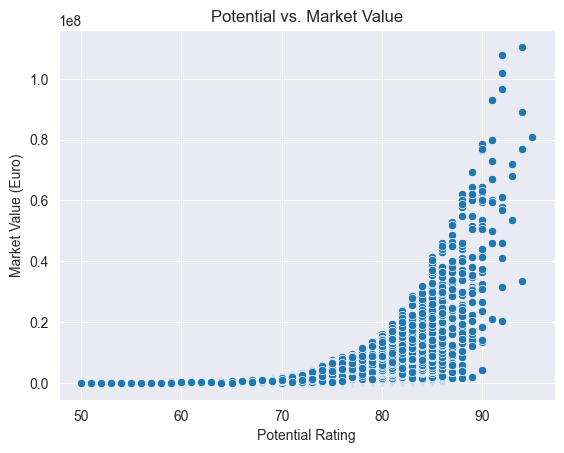

In [3]:
sns.scatterplot(x='potential', y='value_euro', data=df)
plt.title('Potential vs. Market Value')
plt.xlabel('Potential Rating')
plt.ylabel('Market Value (Euro)')
plt.show()

# Data preparation

In [3]:
# List of columns to drop
columns_to_drop = ['full_name', 'birth_date', 'nationality', 'value_euro', 'wage_euro', 'preferred_foot', 'release_clause_euro', 'national_team', 'national_rating', 'national_team_position', 'national_jersey_number']

df = df.drop(columns=columns_to_drop)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   age                            17954 non-null  int64  
 2   height_cm                      17954 non-null  float64
 3   weight_kgs                     17954 non-null  float64
 4   positions                      17954 non-null  object 
 5   overall_rating                 17954 non-null  int64  
 6   potential                      17954 non-null  int64  
 7   international_reputation(1-5)  17954 non-null  int64  
 8   weak_foot(1-5)                 17954 non-null  int64  
 9   skill_moves(1-5)               17954 non-null  int64  
 10  body_type                      17954 non-null  object 
 11  crossing                       17954 non-null  int64  
 12  finishing                      17954 non-null 

In [5]:
df.head(10)

,name,age,height_cm,weight_kgs,positions,overall_rating,potential,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,31,170.18,72.1,"CF,RW,ST",94,94,5,4,4,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",88,89,3,5,4,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,25,190.50,83.9,"CM,CAM",88,91,4,4,5,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,27,162.56,59.0,"LW,ST",88,88,3,4,4,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,27,187.96,88.9,CB,88,91,3,3,2,...,15,87,88,24,49,33,80,91,88,87
5,V. van Dijk,27,193.04,92.1,CB,88,90,3,3,2,...,64,82,88,41,60,62,87,90,89,84
6,K. Mbappé,20,152.40,73.0,"RW,ST,RM",88,95,3,4,5,...,78,62,38,88,82,70,86,34,34,32
7,S. Agüero,30,172.72,69.9,ST,89,89,4,4,4,...,83,65,24,92,83,83,90,30,20,12
8,M. Neuer,32,193.04,92.1,GK,89,89,5,4,1,...,16,29,30,12,70,47,70,17,10,11
9,E. Cavani,32,185.42,77.1,ST,89,89,4,4,3,...,79,84,48,93,77,85,82,52,45,39


In [4]:
# Create a label (category) encoder object
le = LabelEncoder()

# Fit and transform the 'positions' column
df['positions'] = le.fit_transform(df['positions'])

# Fit and transform the 'body_type' column
df['body_type'] = le.fit_transform(df['body_type'])

In [7]:
df.head(10)

,name,age,height_cm,weight_kgs,positions,overall_rating,potential,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,31,170.18,72.1,214,94,94,5,4,4,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,27,154.94,76.2,72,88,89,3,5,4,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,25,190.50,83.9,228,88,91,4,4,5,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,27,162.56,59.0,549,88,88,3,4,4,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,27,187.96,88.9,104,88,91,3,3,2,...,15,87,88,24,49,33,80,91,88,87
5,V. van Dijk,27,193.04,92.1,104,88,90,3,3,2,...,64,82,88,41,60,62,87,90,89,84
6,K. Mbappé,20,152.40,73.0,801,88,95,3,4,5,...,78,62,38,88,82,70,86,34,34,32
7,S. Agüero,30,172.72,69.9,823,89,89,4,4,4,...,83,65,24,92,83,83,90,30,20,12
8,M. Neuer,32,193.04,92.1,327,89,89,5,4,1,...,16,29,30,12,70,47,70,17,10,11
9,E. Cavani,32,185.42,77.1,823,89,89,4,4,3,...,79,84,48,93,77,85,82,52,45,39


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   age                            17954 non-null  int64  
 2   height_cm                      17954 non-null  float64
 3   weight_kgs                     17954 non-null  float64
 4   positions                      17954 non-null  int32  
 5   overall_rating                 17954 non-null  int64  
 6   potential                      17954 non-null  int64  
 7   international_reputation(1-5)  17954 non-null  int64  
 8   weak_foot(1-5)                 17954 non-null  int64  
 9   skill_moves(1-5)               17954 non-null  int64  
 10  body_type                      17954 non-null  int32  
 11  crossing                       17954 non-null  int64  
 12  finishing                      17954 non-null 

# Model creation and training

In [5]:
# Define target variable
target = 'overall_rating'

# Split the data into features (X) and target (y)
X = df.drop([target, 'name'], axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

loss = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss: ', loss)

Epoch 1/10
449/449 [==============================] - 13s 9ms/step - loss: 34.9362
Epoch 2/10
449/449 [==============================] - 5s 11ms/step - loss: 5.3397
Epoch 3/10
449/449 [==============================] - 5s 10ms/step - loss: 4.6266
Epoch 4/10
449/449 [==============================] - 6s 14ms/step - loss: 3.7653
Epoch 5/10
449/449 [==============================] - 5s 11ms/step - loss: 4.2485
Epoch 6/10
449/449 [==============================] - 5s 10ms/step - loss: 3.2036
Epoch 7/10
449/449 [==============================] - 4s 9ms/step - loss: 3.4689
Epoch 8/10
449/449 [==============================] - 4s 8ms/step - loss: 2.4374
Epoch 9/10
449/449 [==============================] - 3s 6ms/step - loss: 2.5351
Epoch 10/10
113/113 [==============================] - 1s 6ms/step - loss: 1.7433
Test Loss:  1.7432552576065063
